In [2]:
!pip install kagglehub


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gti-upm/leapgestrecog")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\91961\.cache\kagglehub\datasets\gti-upm\leapgestrecog\versions\1


In [4]:
pip install numpy pandas opencv-python matplotlib scikit-learn tensorflow


⏬ Downloading dataset...
📁 Dataset path: C:\Users\91961\.cache\kagglehub\datasets\gti-upm\leapgestrecog\versions\1

🖼️ Loading PNG images...

✅ Loaded 40000 images
Image shape: (40000, 64, 64, 1), Labels shape: (40000, 10)


C:\Users\91961\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 59s 112ms/step - accuracy: 0.7969 - loss: 0.6139 - val_accuracy: 0.9999 - val_loss: 0.0025
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 64s 127ms/step - accuracy: 0.9962 - loss: 0.0143 - val_accuracy: 0.9950 - val_loss: 0.0109
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 58s 115ms/step - accuracy: 0.9979 - loss: 0.0077 - val_accuracy: 0.9998 - val_loss: 0.0012
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 52s 105ms/step - accuracy: 0.9979 - loss: 0.0059 - val_accuracy: 1.0000 - val_loss: 3.9972e-04
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 91s 122ms/step - accuracy: 0.9987 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 1.0837e-04
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 57s 114ms/step - accuracy: 0.9981 - loss: 0.0053 - val_accuracy: 0.9998 - val_loss: 0.0017
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 58s 116ms/step - accuracy: 0.9982 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 2.3711e-05
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 54s 109ms/step - accuracy: 0.99

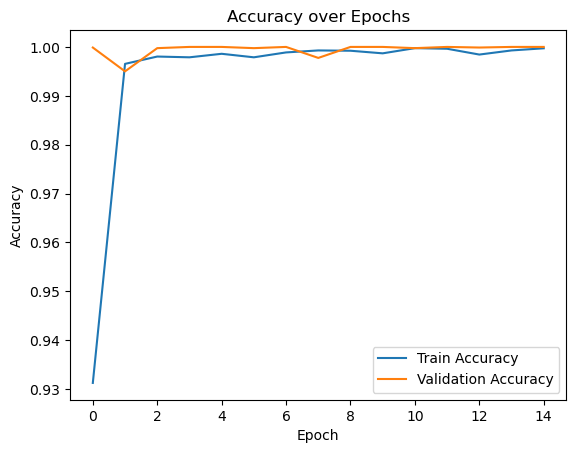

✅ Model saved as gesture_model.h5


In [10]:
# STEP 1: Imports
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import kagglehub

# STEP 2: Download and Locate Dataset
print("⏬ Downloading dataset...")
path = kagglehub.dataset_download("gti-upm/leapgestrecog", force_download=False)
print(f"📁 Dataset path: {path}")

data_dir = path  # Root directory

# STEP 3: Load PNG Images and Labels
images, labels = [], []

print("\n🖼️ Loading PNG images...")
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.lower().endswith(".png"):
            img_path = os.path.join(root, file)
            try:
                parent_dir = os.path.basename(os.path.dirname(img_path))
                label = int(parent_dir.split('_')[0]) - 1  # "01_palm" → 0
            except Exception as e:
                print(f"⚠️ Skipping {img_path}: {e}")
                continue

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (64, 64))
                images.append(img)
                labels.append(label)
            else:
                print(f"⚠️ Failed to load image: {img_path}")

if not images:
    raise Exception("❌ No PNG images loaded. Please check the folder structure.")

images = np.array(images) / 255.0
images = images.reshape(-1, 64, 64, 1)
labels = to_categorical(np.array(labels), num_classes=len(set(labels)))

print(f"\n✅ Loaded {images.shape[0]} images")
print(f"Image shape: {images.shape}, Labels shape: {labels.shape}")

# STEP 4: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, stratify=labels, random_state=42
)

# STEP 5: Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(labels.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# STEP 6: Train Model
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

# STEP 7: Evaluate and Visualize
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n🎯 Test Accuracy: {test_acc:.4f}")

plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# (Optional) Save model
model.save("gesture_model.h5")
print("✅ Model saved as gesture_model.h5")


In [11]:
pip install opencv-python tensorflow


In [12]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("gesture_model.h5")

# Label map: adjust if your dataset uses different gesture names
gesture_labels = [
    "Palm", "L", "Fist", "Fist Moved", "Thumb", 
    "Index", "OK", "Palm Moved", "C", "Down"
]

# Initialize webcam
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot access webcam")

print("🎥 Starting webcam... Press 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("❌ Failed to capture frame.")
        break

    # Mirror the image for natural interaction
    frame = cv2.flip(frame, 1)

    # Define ROI box (adjust size as needed)
    x1, y1, x2, y2 = 100, 100, 300, 300
    roi = frame[y1:y2, x1:x2]

    # Preprocess ROI
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (64, 64))
    normalized = resized.astype("float32") / 255.0
    input_img = np.expand_dims(normalized, axis=(0, -1))  # Shape: (1, 64, 64, 1)

    # Predict gesture
    prediction = model.predict(input_img)
    pred_label = gesture_labels[np.argmax(prediction)]

    # Display prediction
    cv2.putText(frame, f"Gesture: {pred_label}", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Show frame
    cv2.imshow("Real-Time Gesture Recognition", frame)

    # Quit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


🎥 Starting webcam... Press 'q' to quit.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━